# (N)on-(E)uclidean (U)pgrading
---
#### Description of NEU:
The NEU meta-algorithm learns a geometry for the input and (input $\times$ output) spaces by deforming them with a universal class of homeomorphisms + robustifies the involved loss functions to improve generalizability of the new and very flexible model.  
$$
\begin{aligned}
f \mapsto& \, \rho \circ f \circ \phi\\
\mathbb{E}_{\mathbb{P}}[\ell(f(X))] \mapsto & \,\max_{\mathbb{Q}\sim \mathbb{P}}\, \mathbb{E}_{\mathbb{Q}}[\ell(\rho(\phi(X), f\circ \phi(X)))].
\end{aligned}
$$
$\rho=\pi\circ \tilde{\rho}$, and $\tilde{\rho}$ and $\phi$ are "universal homeomorphisms" on $\operatorname{dom}(f)$ and on $\operatorname{dom}(f)\times \operatorname{co-dom}(f)$, respectively.  

---

---

#### Description of regression problem: 
In this notebook we implement the regression problem
$$
\begin{aligned}
y_i =&  \,f(x_i)\delta_i + \epsilon_i, \qquad i=1,\dots,N\\
\epsilon_i \sim &\, \mathcal{N}(0,\sigma),\\
\delta_i\sim &  \,U(1-D,1+D),
\end{aligned}
$$
for some *variance* $\sigma>0$ and *degree of model misspecification level* $0<D<1$.  
The quantity $\epsilon$ can be understood as, classical, additive noise while the quantity $\delta$ represents multiplicative noise.

---

---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [150]:
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# Load Hyper( and meta) parameter(s)
%run Helper_Functions.ipynb

Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!


## Initialize Internal Variables/(Hyper)parameter(s)

## Check/Make Paths

In [151]:
Path('./outputs/models/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/GLd_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/Ed_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Linear_Regression/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/Base_Regressor/').mkdir(parents=True, exist_ok=True)
Path('./outputs/tables/').mkdir(parents=True, exist_ok=True)
Path('./outputs/results/').mkdir(parents=True, exist_ok=True)
Path('./inputs/data/').mkdir(parents=True, exist_ok=True)

# Generate Training Data

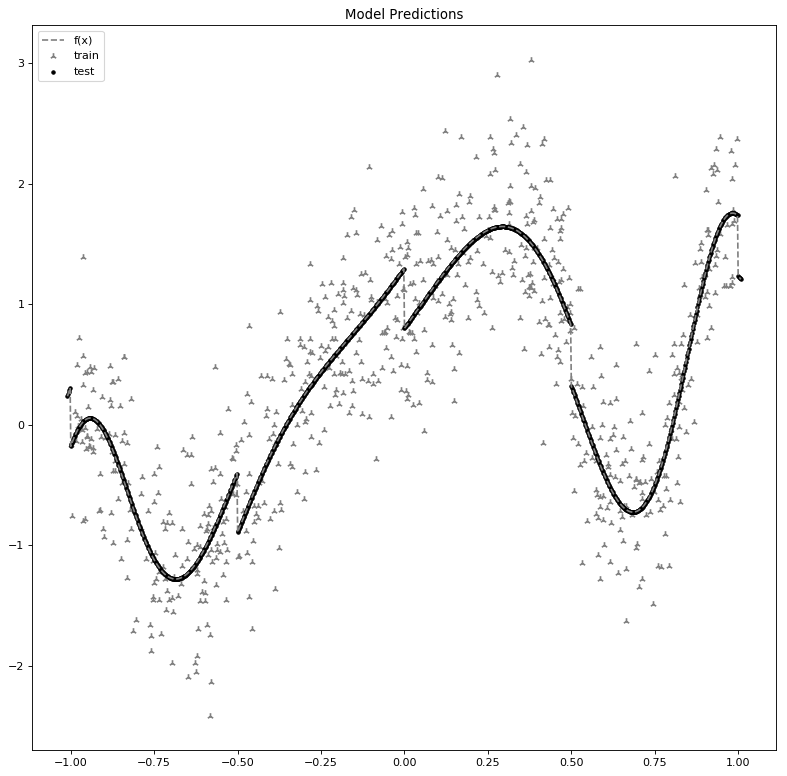

In [152]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
%run Data_Generator.ipynb

#### Prepare data for NEU

## 1) Get Basic Regression Models
 1. Get Base regression model (benchmark),
 2. Get Base regression model for NEU.

## Get basic regression model - Benchmark

In [179]:
if False:#os.path.exists('./outputs/models/Benchmarks/Linear_Regression/saved_model.pb'):
    #------------------#
    # Load Readout Map #
    #------------------#
    print('Benchmark model - already exists: Loading...')
    regression_Benchmark = tf.keras.models.load_model("./outputs/models/Benchmarks/Linear_Regression/")
    print('Benchmark model - already exists: Loaded.')
else:
    print('Pre-trained benchmark model does not exist: Training.')
    tf.random.set_seed(2020)
    ffNN_y_hat_train,ffNN_y_hat_test = build_ffNN(n_folds =2, 
                                                 n_jobs = 3, 
                                                 n_iter = 1, 
                                                 param_grid_in = param_grid_Vanilla_Nets, 
                                                 X_train = data_x, 
                                                 y_train = data_y,
                                                 X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    7.9s finished


Epoch 1/200
47/47 [==============================] - 0s 1ms/step - loss: 0.8805 - mse: 1.3117 - mae: 0.8805 - mape: 1357.8425
Epoch 2/200
47/47 [==============================] - 0s 1ms/step - loss: 0.7496 - mse: 0.8884 - mae: 0.7496 - mape: 780.5032
Epoch 3/200
47/47 [==============================] - 0s 1ms/step - loss: 0.7047 - mse: 0.7848 - mae: 0.7047 - mape: 1107.2850
Epoch 4/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6628 - mse: 0.6848 - mae: 0.6628 - mape: 1165.5800
Epoch 5/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6656 - mse: 0.7058 - mae: 0.6656 - mape: 1601.6486
Epoch 6/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6711 - mse: 0.7049 - mae: 0.6711 - mape: 1389.8771
Epoch 7/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6791 - mse: 0.7122 - mae: 0.6791 - mape: 1393.0056
Epoch 8/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6418 - mse: 0.6678 - mae: 0.6418 - mape: 155

47/47 [==============================] - 0s 1ms/step - loss: 0.6464 - mse: 0.6716 - mae: 0.6464 - mape: 1404.2134
Epoch 66/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6376 - mse: 0.6589 - mae: 0.6376 - mape: 1270.3165
Epoch 67/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6579 - mse: 0.6828 - mae: 0.6579 - mape: 1329.7396
Epoch 68/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6342 - mse: 0.6402 - mae: 0.6342 - mape: 1324.9821
Epoch 69/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6629 - mse: 0.6859 - mae: 0.6629 - mape: 1412.6624
Epoch 70/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6390 - mse: 0.6540 - mae: 0.6390 - mape: 1317.5474
Epoch 71/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6579 - mse: 0.6856 - mae: 0.6579 - mape: 1624.2512
Epoch 72/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6706 - mse: 0.7089 - mae: 0.6706 - mape: 1134.89

47/47 [==============================] - 0s 2ms/step - loss: 0.6328 - mse: 0.6551 - mae: 0.6328 - mape: 1442.5978
Epoch 130/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6250 - mse: 0.6523 - mae: 0.6250 - mape: 1156.8245
Epoch 131/200
47/47 [==============================] - 0s 3ms/step - loss: 0.6286 - mse: 0.6497 - mae: 0.6286 - mape: 1404.0818
Epoch 132/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6322 - mse: 0.6532 - mae: 0.6322 - mape: 1208.5889
Epoch 133/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6352 - mse: 0.6520 - mae: 0.6352 - mape: 1373.2987
Epoch 134/200
47/47 [==============================] - 0s 981us/step - loss: 0.6441 - mse: 0.6701 - mae: 0.6441 - mape: 1187.7378
Epoch 135/200
47/47 [==============================] - 0s 851us/step - loss: 0.6337 - mse: 0.6383 - mae: 0.6337 - mape: 1434.9597
Epoch 136/200
47/47 [==============================] - 0s 964us/step - loss: 0.6265 - mse: 0.6400 - mae: 0.6265 - 

Epoch 193/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6269 - mse: 0.6435 - mae: 0.6269 - mape: 1282.0581
Epoch 194/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6514 - mse: 0.6901 - mae: 0.6514 - mape: 1254.0269
Epoch 195/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6506 - mse: 0.6784 - mae: 0.6506 - mape: 1524.1577
Epoch 196/200
47/47 [==============================] - 0s 966us/step - loss: 0.6296 - mse: 0.6550 - mae: 0.6296 - mape: 1394.2544
Epoch 197/200
47/47 [==============================] - 0s 974us/step - loss: 0.6395 - mse: 0.6756 - mae: 0.6395 - mape: 1422.7372
Epoch 198/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6350 - mse: 0.6560 - mae: 0.6350 - mape: 1494.5917
Epoch 199/200
47/47 [==============================] - 0s 1ms/step - loss: 0.6209 - mse: 0.6222 - mae: 0.6209 - mape: 1218.9519
Epoch 200/200
64/64 [==============================] - 0s 561us/step
Benchmark-Model: Saving
Benchma

# Train NEU-ffNN

In [188]:
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# Load Hyper( and meta) parameter(s)
%run Helper_Functions.ipynb

Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!


In [189]:
tf.random.set_seed(2020)
print('Pre-trained benchmark model does not exist: Training.')
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN_test(n_folds =2, 
                                                          n_jobs = 3, 
                                                          n_iter = 1, 
                                                          param_grid_in = param_grid_NEU_Nets, 
                                                          X_train = data_x, 
                                                          y_train = data_y,
                                                          X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    5.5s finished


Epoch 1/200
47/47 [==============================] - 0s 2ms/step - loss: 0.8660 - mse: 1.1156 - mae: 0.8660 - mape: 1016.3300
Epoch 2/200
47/47 [==============================] - 0s 2ms/step - loss: 0.8116 - mse: 0.9707 - mae: 0.8116 - mape: 743.7026
Epoch 3/200
47/47 [==============================] - 0s 2ms/step - loss: 0.7663 - mse: 0.9475 - mae: 0.7663 - mape: 1610.5616
Epoch 4/200
47/47 [==============================] - 0s 2ms/step - loss: 0.7028 - mse: 0.7745 - mae: 0.7028 - mape: 1217.5323
Epoch 5/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6856 - mse: 0.7236 - mae: 0.6856 - mape: 1052.0439
Epoch 6/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6798 - mse: 0.7456 - mae: 0.6798 - mape: 472.9903
Epoch 7/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6728 - mse: 0.7052 - mae: 0.6728 - mape: 530.4883
Epoch 8/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6578 - mse: 0.6693 - mae: 0.6578 - mape: 856.0

47/47 [==============================] - 0s 3ms/step - loss: 0.6624 - mse: 0.6998 - mae: 0.6624 - mape: 1419.7892
Epoch 66/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6495 - mse: 0.6844 - mae: 0.6495 - mape: 1449.7140
Epoch 67/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6617 - mse: 0.6958 - mae: 0.6617 - mape: 1461.7427
Epoch 68/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6435 - mse: 0.6724 - mae: 0.6435 - mape: 1359.7150
Epoch 69/200
47/47 [==============================] - 0s 3ms/step - loss: 0.6562 - mse: 0.6969 - mae: 0.6562 - mape: 1497.1610
Epoch 70/200
47/47 [==============================] - 0s 3ms/step - loss: 0.6494 - mse: 0.6796 - mae: 0.6494 - mape: 1384.6943
Epoch 71/200
47/47 [==============================] - 0s 3ms/step - loss: 0.6646 - mse: 0.7081 - mae: 0.6646 - mape: 1687.9070
Epoch 72/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6548 - mse: 0.6921 - mae: 0.6548 - mape: 1360.69

47/47 [==============================] - 0s 2ms/step - loss: 0.6708 - mse: 0.6957 - mae: 0.6708 - mape: 1325.0546
Epoch 129/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6552 - mse: 0.6874 - mae: 0.6552 - mape: 1446.4773
Epoch 130/200
47/47 [==============================] - 0s 3ms/step - loss: 0.6423 - mse: 0.6641 - mae: 0.6423 - mape: 1254.5837
Epoch 131/200
47/47 [==============================] - 0s 3ms/step - loss: 0.6478 - mse: 0.6907 - mae: 0.6478 - mape: 1525.0421
Epoch 132/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6607 - mse: 0.6911 - mae: 0.6607 - mape: 1153.8121
Epoch 133/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6405 - mse: 0.6629 - mae: 0.6405 - mape: 1213.3146
Epoch 134/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6754 - mse: 0.7162 - mae: 0.6754 - mape: 1341.8995
Epoch 135/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6613 - mse: 0.6827 - mae: 0.6613 - mape: 

47/47 [==============================] - 0s 2ms/step - loss: 0.6571 - mse: 0.6896 - mae: 0.6571 - mape: 1426.3207
Epoch 193/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6574 - mse: 0.6980 - mae: 0.6574 - mape: 1174.7520
Epoch 194/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6726 - mse: 0.7374 - mae: 0.6726 - mape: 1415.4153
Epoch 195/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6838 - mse: 0.7272 - mae: 0.6838 - mape: 1385.5771
Epoch 196/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6529 - mse: 0.6737 - mae: 0.6529 - mape: 1375.2401
Epoch 197/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6723 - mse: 0.7138 - mae: 0.6723 - mape: 1455.0104
Epoch 198/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6597 - mse: 0.6990 - mae: 0.6597 - mape: 1723.0784
Epoch 199/200
47/47 [==============================] - 0s 2ms/step - loss: 0.6371 - mse: 0.6519 - mae: 0.6371 - mape: 

### Generate Plots - Visualization

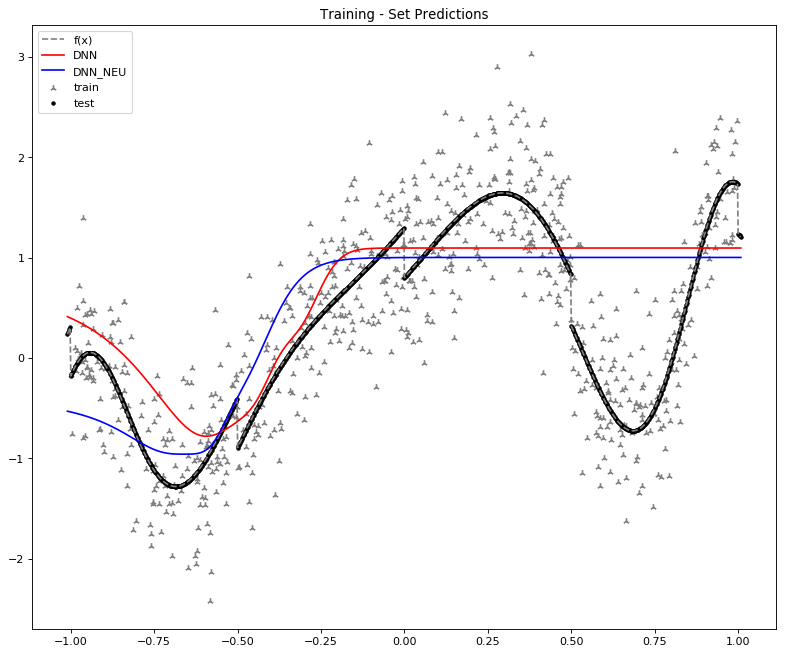

In [190]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y.reshape(-1,),color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test.reshape(-1,),color='black',label='test', marker = '.')


# Plot Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')
# Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, color = 'blue',label='DNN_NEU')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Training - Set Predictions")
plt.show()

## Performance Report

In [191]:
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))

ffNN-Performance:
           train        test
MAE     0.643312    0.499068
MSE     0.700961    0.474706
MAPE  408.262532  190.049001
NEU-ffNN Performance:
           train       test
MAE     0.649472   0.515994
MSE     0.682193   0.454948
MAPE  115.800370  98.642653


---
---
---

# Benchmark Models

Run univariate regression benchmarks file:

In [ ]:
# Run Univariate Regression File #
#--------------------------------#
%run Univariate_Regression_Benchmark_Models.ipynb

## Model Evaluation: 
*Record Error(s)/Prediction Quality*

Train results.

In [ ]:
# Train Set #
#-----------#
Vanilla = get_results(predictions_OLS_Benchmark,data_y)
NEU = get_results(NEU_OLS_prediction,data_y)
NEU_Gld = get_results(Deep_GLd_prediction,data_y)
NEU_Ed = get_results(Deep_Ed_prediction,data_y)
SSplines = get_results(f_hat_smoothing_splines_train,data_y)
LOESS = get_results(LOESS_prediction_train,data_y)

# Write to DataFrame
Results = pd.DataFrame({'Vanilla': Vanilla,
                             'NEU': NEU,
                             'NEU_GLd': NEU_Gld,
                             'NEU_Ed':NEU_Ed,
                             'Smoothing_Splines':SSplines,
                             'LOESS':LOESS},index={'MAE','MinE','MaxE','MSE','rMSE'})
# Format
Results = pd.DataFrame.transpose(Results)

# Write Results to file #
#-----------------------#
Results.to_latex('./outputs/results/Performance.txt')
# Write to Txt
cur_path = os.path.expanduser('./outputs/results/Performance_text.txt')
with open(cur_path, "w") as f:
    f.write(str(Results))

Test results.

In [ ]:
# Test Set #
#----------#
Vanilla = get_results(predictions_OLS_Benchmark_test,data_y_test)
NEU = get_results(NEU_OLS_prediction_test,data_y_test)
NEU_Gld = get_results(Deep_GLd_prediction_test,data_y_test)
NEU_Ed = get_results(Deep_Ed_prediction_test,data_y_test)
SSplines = get_results(f_hat_smoothing_splines_test,data_y_test)
LOESS = get_results(LOESS_prediction_test,data_y_test)

# Write to DataFrame
Results_test = pd.DataFrame({'Vanilla': Vanilla,
                             'NEU': NEU,
                             'NEU_GLd': NEU_Gld,
                             'NEU_Ed':NEU_Ed,
                             'Smoothing_Splines':SSplines,
                             'LOESS':LOESS},index={'MAE','MinE','MaxE','MSE','rMSE'})
# Format
Results_test = pd.DataFrame.transpose(Results_test)

# Write Results to file #
#-----------------------#
Results_test.to_latex('./outputs/results/Performance_test.txt')
# Write to Txt
cur_path = os.path.expanduser('./outputs/results/Performance_test_text.txt')
with open(cur_path, "w") as f:
    f.write(str(Results_test))

# Visualize Predictions

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

# Plot Benchmark(s)
#------------------#
# Standard Benchmarks
plt.plot(np.array(data_x_test).reshape(-1,),(predictions_OLS_Benchmark_test), color = 'red', label='DNN')
# Plot Univariate Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),f_hat_smoothing_splines_test,color='pink',label='Splines')
plt.plot(np.array(data_x_test).reshape(-1,),LOESS_prediction_test,color='purple',label='LOESS')
# NEU Benchmarks: Alternatives to reconfigurations
plt.plot(np.array(data_x_test).reshape(-1,),Deep_GLd_prediction_test,color='lightblue',label='Deep-GLd')
plt.plot(np.array(data_x_test).reshape(-1,),Deep_Ed_prediction_test,color='orange',label='Deep-Ed')

# Plot NEU Regressors
# ---------------------------------- for INDEV  only: BEGIN --------------------------------------------------- #
# plt.plot(np.array(data_x_test).reshape(-1,),predictions_OLS_test[:,1], color = 'blue',label='DNN_NEU')
# plt.plot(np.array(data_x_test).reshape(-1,),(NEU_OLS_greedy_initializations_test[:,-1]), color = 'lightgreen',label='NEU-Reg-Init')
# ---------------------------------- for INDEV  only: END ----------------------------------------------------- #
plt.plot(np.array(data_x_test).reshape(-1,),(NEU_OLS_prediction_test), color = 'green',label='NEU-Reg')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")
plt.show()

 ---

# Report Results

In [ ]:
print('Train Results:')
Results.style.apply(lambda col: ['font-weight:bold' if x==col.min() else '' for x in col])

In [ ]:
print('Test Results:')
Results_test.style.apply(lambda col: ['font-weight:bold' if x==col.min() else '' for x in col])

#### The END

---